In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
import warnings
warnings.filterwarnings("ignore")

import statsmodels.formula.api as smf
from scipy.stats import shapiro,levene


In [241]:
data=pd.read_csv('diabetes.csv') #importing the data

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [242]:
data.describe() #here we're describing the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [243]:
data.info() #getting the information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [244]:
data.shape

(768, 9)

### PERFORMING DATA

In [245]:
data.isnull().sum() #checking whether the data having null values or not

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [246]:
data['Outcome'].value_counts() #individual count of the dataset

0    500
1    268
Name: Outcome, dtype: int64

In [247]:
x=data.drop('Outcome',axis=1) #dropping outcome in x and target variable in y
x.head()
y=data['Outcome']
y.head()


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### BIVARIATE ANALYSIS

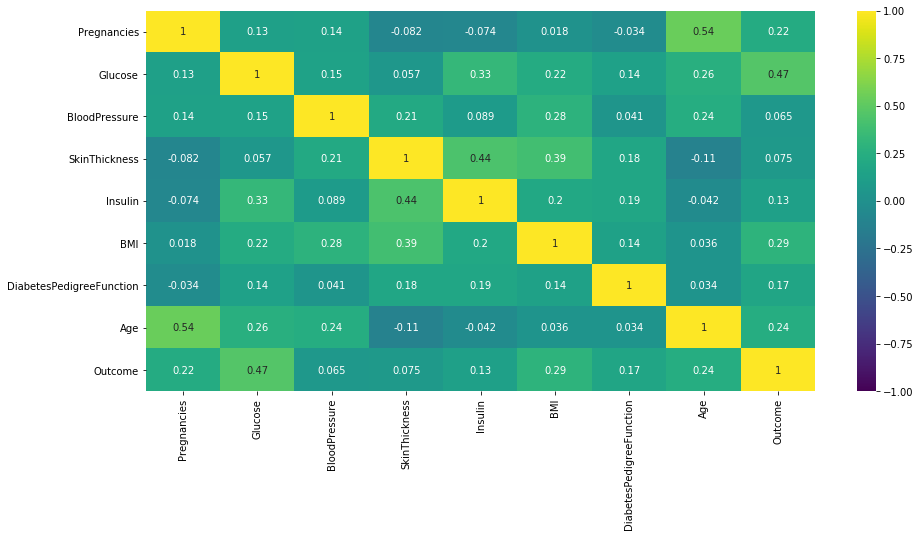

In [40]:
sns.set_palette(sns.color_palette("Set1", 8))
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,cmap='viridis')
plt.show()

### PLOTS

In [93]:
def hist_count(column, data):
    if column in data:
        f, axes = plt.subplots(1,1,figsize=(15,5))
        sns.countplot(x=column, data=data)
        plt.xticks(rotation = 90)
        plt.suptitle(column, fontsize=20)
        plt.show()
    plt.show()

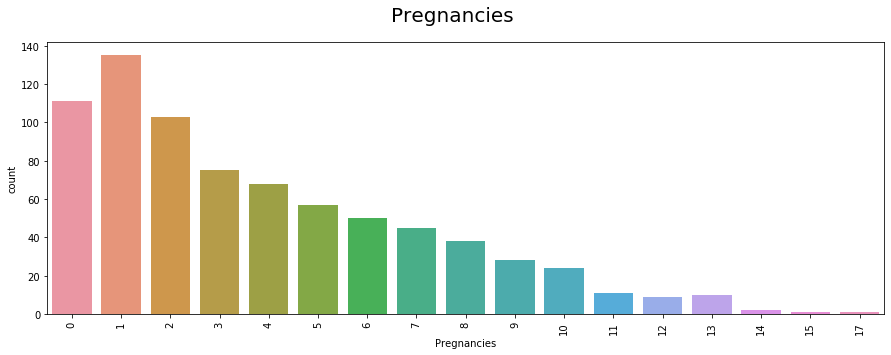

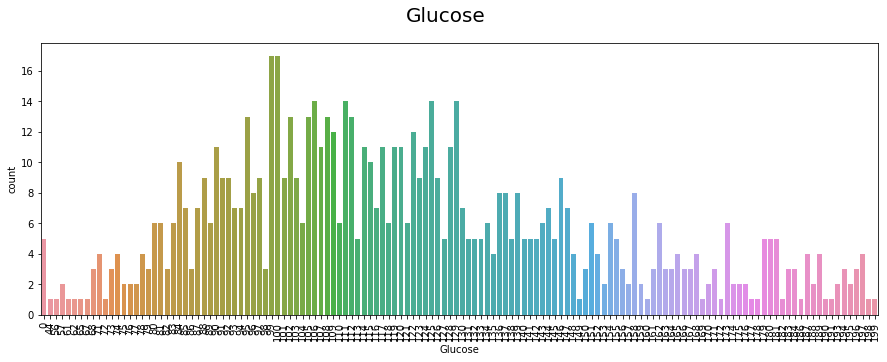

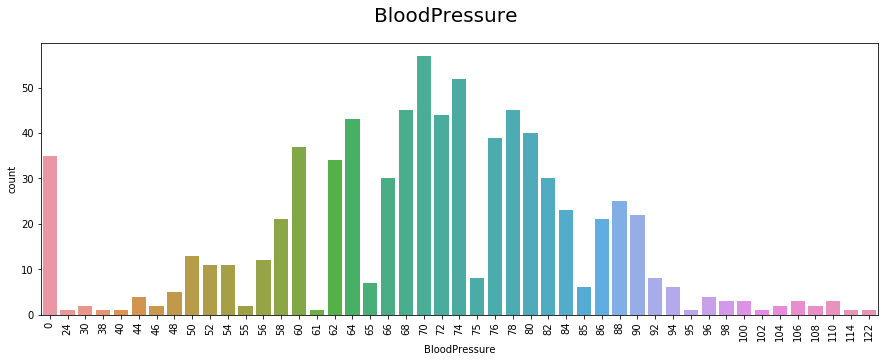

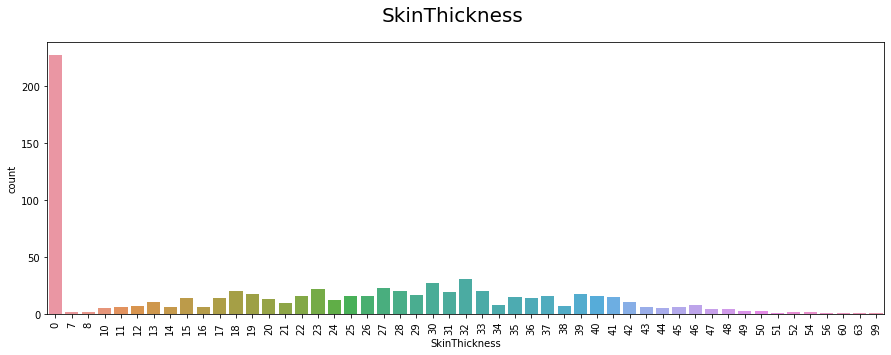

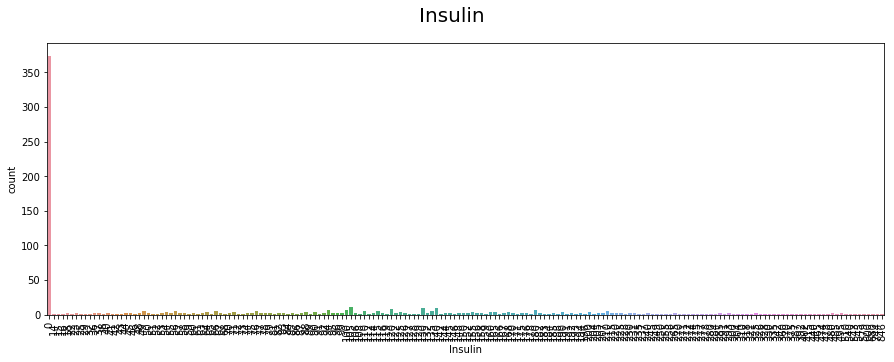

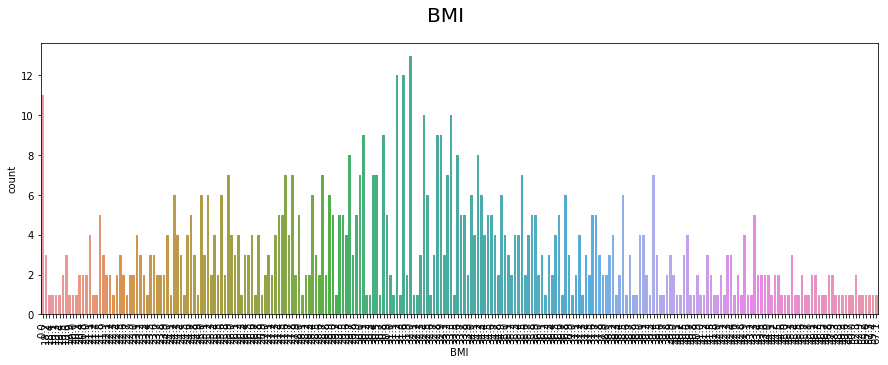

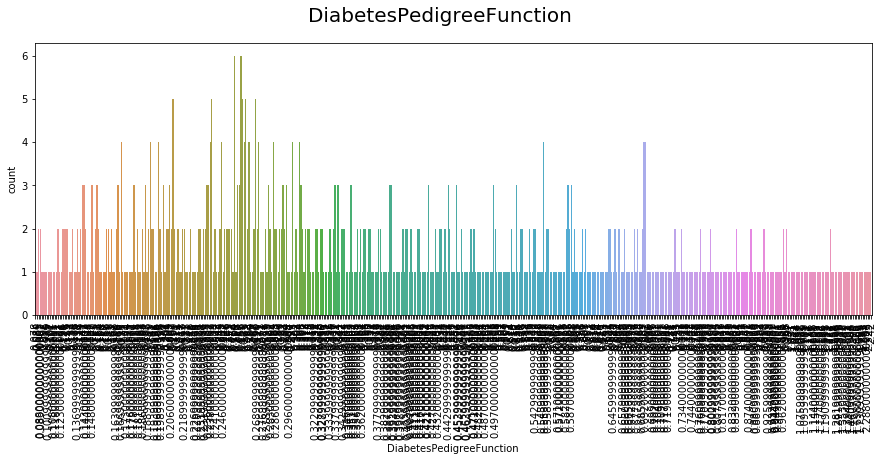

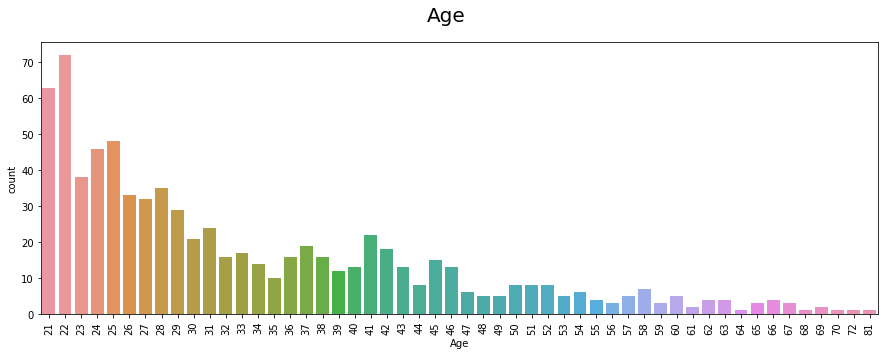

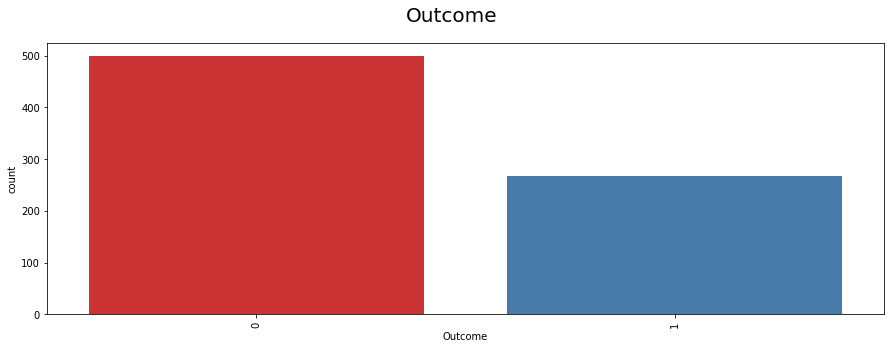

In [42]:
for column in data.columns:
    hist_count(column,data)

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

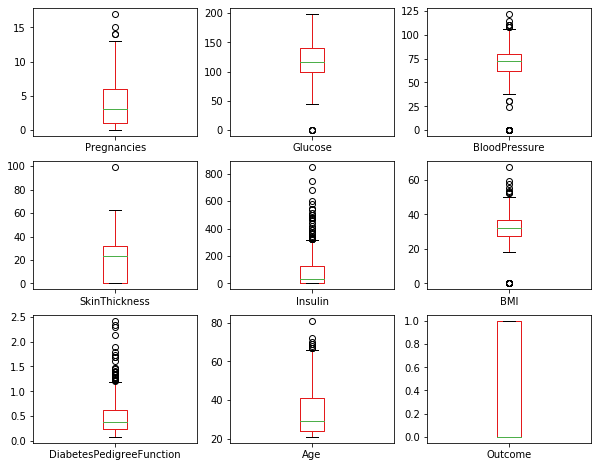

In [43]:
#BOXPLOT for checking the outliers
data.plot(kind= 'box' , subplots=True,layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

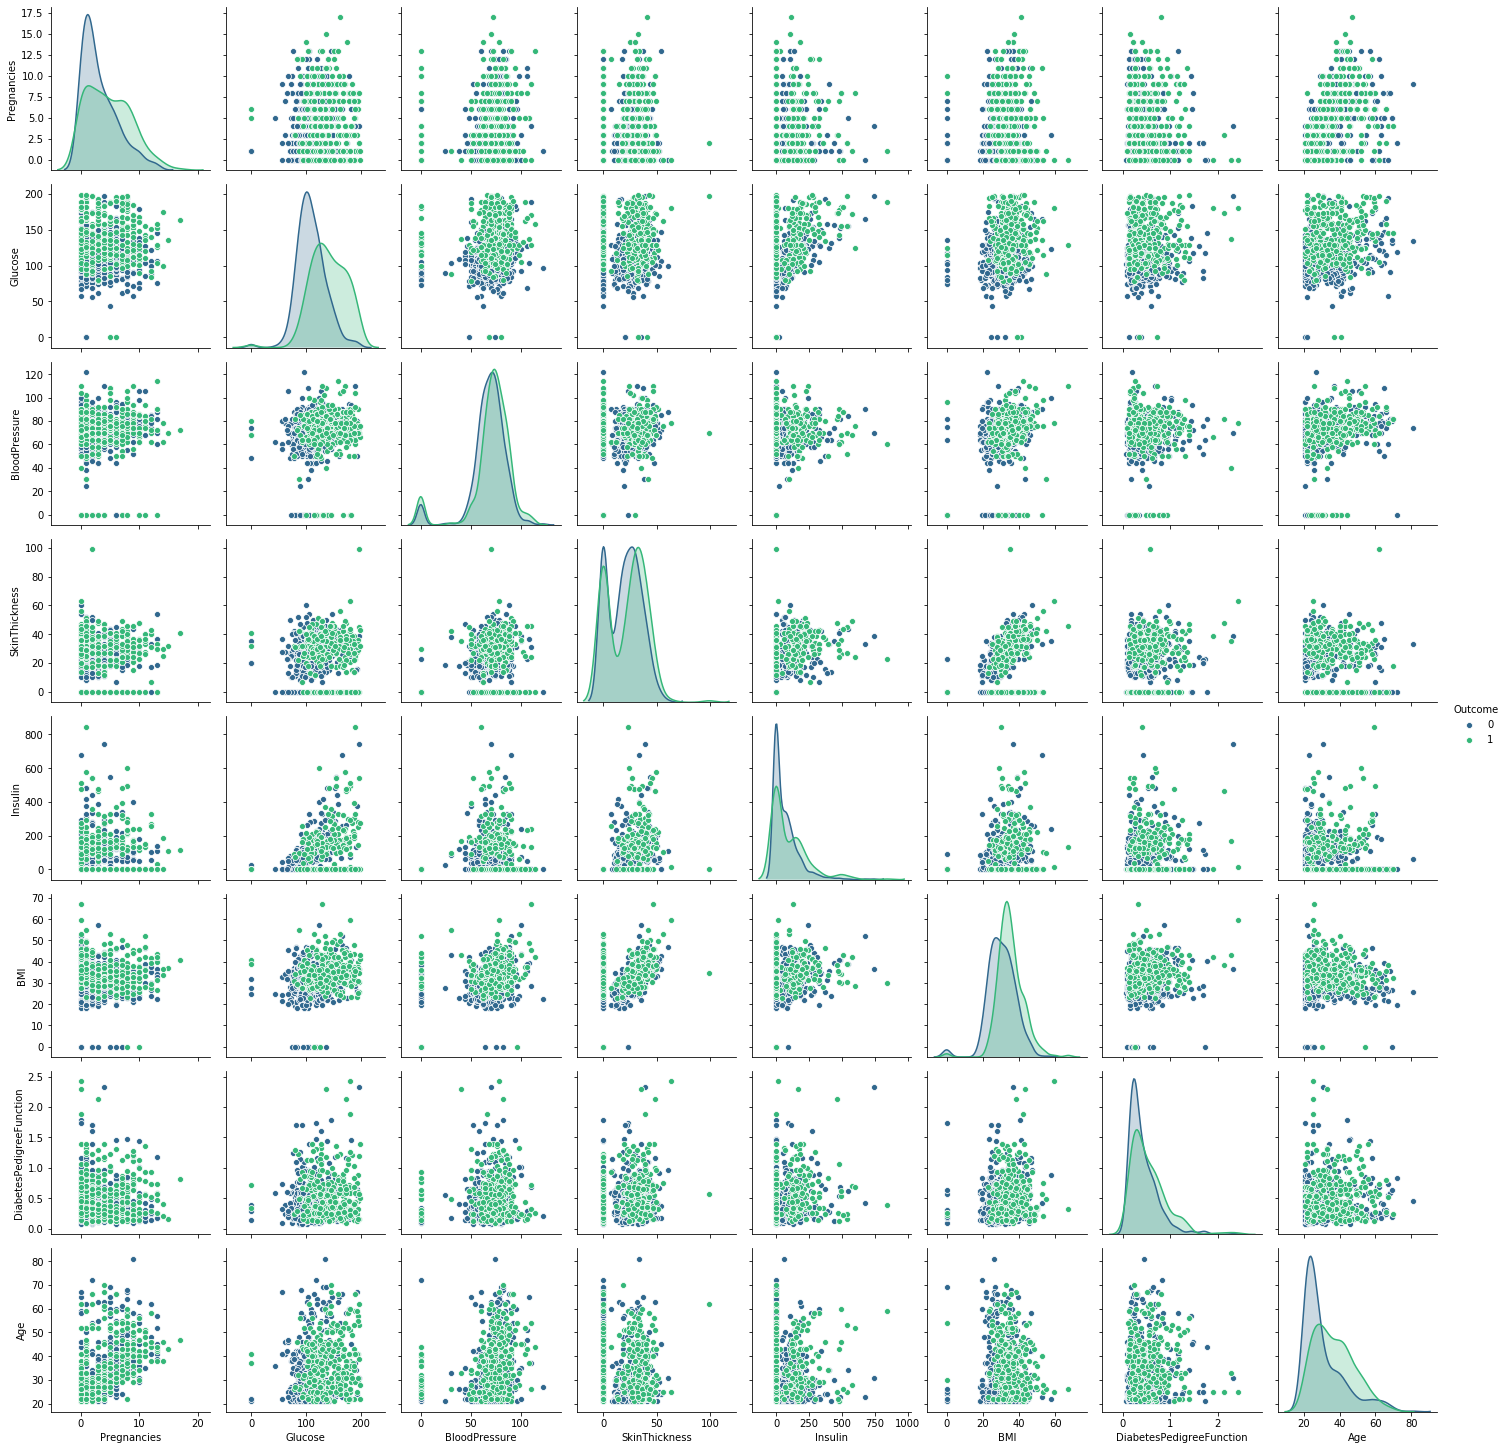

In [44]:
# pairploting
sns.pairplot(data, hue="Outcome", palette="viridis");

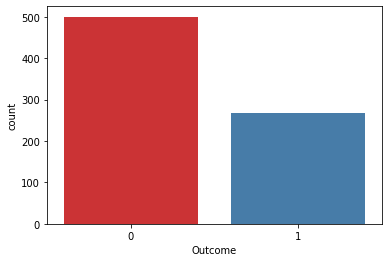

In [248]:
sns.countplot(data['Outcome']) #plot for yes or no outcome for the data

In [249]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(data)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


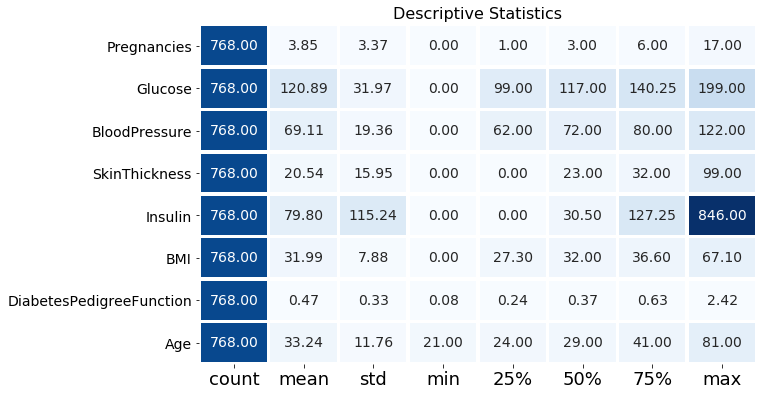

In [251]:
def desc_stats(dataframe):
    desc = dataframe.describe().T
    desc_data = pd.DataFrame(index= [col for col in dataframe.columns], 
                           columns= desc.columns,
                           data= desc)
    
    f,ax = plt.subplots(figsize=(10,
                                 desc_data.shape[0]*0.78))
    sns.heatmap(desc_data,
                annot=True,
                cmap = "Blues",
                fmt= '.2f',
                ax=ax,
                linewidths = 2.6,
                cbar = False,
                annot_kws={"size": 14})
    plt.xticks(size = 18)
    plt.yticks(size = 14,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 16)
    plt.show()
    
desc_stats(data[num_cols])


### CONFUSION MATRIX

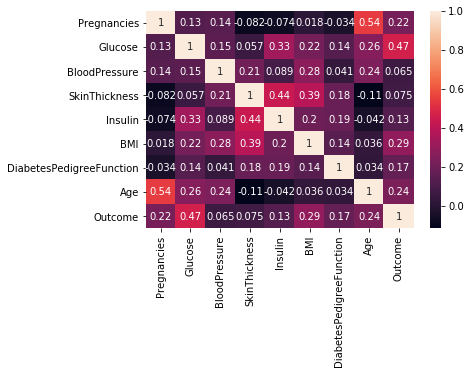

In [252]:
import seaborn as sns
sns.heatmap(data.corr(), annot = True) #checking correlation in matrix for variables using HEATMAP

### SPLITTING THE DATA

In [253]:
X=data.iloc[:,:-1]
X.head()
Y=data.iloc[:,-1]
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### TRAINING AND TESTING DATA SETS

In [254]:
#train_test_splitting of the dataset

X = data.drop(columns = 'Outcome')

# Getting Predicting Value
y = data['Outcome']

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

614
154
614
154


### MACHINE LEARNING ALGORITHMS

In [255]:
def Classification_models(x,y,xt,yt):
    # Importing All LIberaries
    from sklearn.metrics import accuracy_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import GaussianNB
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import svm
    from sklearn.neighbors import KNeighborsClassifier

    # Initializing models
    logisreg = LogisticRegression()
    gnb = GaussianNB()
    dtc = DecisionTreeClassifier()
    rfc = RandomForestClassifier()
    svmodel = svm.SVC()
    knnmodel = KNeighborsClassifier()
    
    # Fitting Models
    logisreg.fit(x,y)
    gnb.fit(x,y)
    dtc.fit(x,y)
    rfc.fit(x,y)
    svmodel.fit(x,y)
    knnmodel.fit(x,y)
    
    # Getting PRedicting Values
    logi_pred = logisreg.predict(xt)
    gnb_pred = gnb.predict(xt)
    dtc_pred = dtc.predict(xt)
    rfc_pred = rfc.predict(xt)
    svm_pred = svmodel.predict(xt)
    knn_pred = knnmodel.predict(xt)
    
    # Getting Accuracy Score
    acc_logisreg = accuracy_score(yt, logi_pred)
    acc_ganb = accuracy_score(yt, gnb_pred)
    acc_dtree = accuracy_score(yt, dtc_pred)
    acc_rf = accuracy_score(yt, rfc_pred)
    acc_svc = accuracy_score(yt, svm_pred)
    acc_knn = accuracy_score(yt, knn_pred)
    # MOdel Selection
    models = pd.DataFrame({
    'Model': ['Logistic Regression','Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors'],
    'Score': [acc_logisreg, acc_ganb, acc_dtree, acc_rf, acc_svc, acc_knn]})

    print(models.sort_values(by='Score', ascending=False))
    sns.barplot(x = models['Score'], y = models['Model'], palette='viridis');

                     Model     Score
0      Logistic Regression  0.824675
3            Random Forest  0.818182
1              Naive Bayes  0.792208
4  Support Vector Machines  0.792208
2            Decision Tree  0.772727
5    K - Nearest Neighbors  0.753247


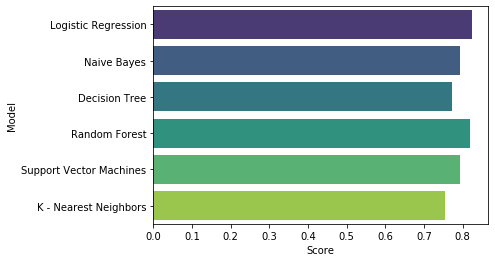

In [256]:
Classification_models(X_train, y_train, X_test, y_test)

### CONNCLUSION:
### The best in all the algorithms is LOGISTIC REGRESSION WITH ACCURACY 82.46%